**Face Detection with Haar Cascade**

This notebook implements Haar Cascades to detect objects like faces and eyes using OpenCV. This method was proposed in 2001 in the paper[Rapid object detection using a boosted cascade of simple features](https://ieeexplore.ieee.org/document/990517) by Viola and Jones. 

The Haar Cascades are based on machine learning techniques. The model here is an XML file which has been trained to detect to a particular object. We will demonstrate face and eye detection with pretrained models in this notebook.


# Detection on Images
## Import necessary libraries

In [1]:
import numpy as np
import cv2 as cv2


%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)

#Routine to fix 
def fixColor(image):
    return(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))

## Create seperate classifiers for both face and eyes

In [2]:
face_cascade = cv2.CascadeClassifier()
eye_cascade = cv2.CascadeClassifier()


Load the cascade files from the model directory. This steps reads the XML file, parses it, deserialises and loads it into memory for further use.

Several pre-trained cascade files can be found in the link https://github.com/opencv/opencv/tree/master/data/haarcascades

In [3]:
if not face_cascade.load(cv2.samples.findFile('./model_data/haarcascade_frontalface_alt.xml')):
    print('--(!)Error loading face cascade')
if not eye_cascade.load(cv2.samples.findFile('./model_data/haarcascade_eye.xml')):
    print('--(!)Error loading eye cascade')
    

## Reading and PreProcessing Image

In the preprocessing steps we will convert the picture to a B/W and then equalise histograms to improve the contrast the image. This helps the algorithm to delineate features. For e.g., the eyes usually are lighter than the cheeks. The pupils are darker. Enhancing contrasts improves the detectability of features and improves object detection.

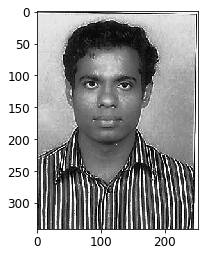

In [4]:
image = cv2.imread('images/mugshot.jpg')
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
#Equalising Histograms increases the contrasts which improves
gray = cv2.equalizeHist(gray) 
plt.imshow(fixColor(gray))

## Apply Cascade Filters
The detection is done using an inbuilt function called detectMultiScale. It has 2 important parameters that can be tuned to improved detection.

1. scaleFactor: The object can be at different scales in an image. For e.g. a face closer to camera will be larger than the one further away. The scale factor is used to build a scale pyramid with each step smaller by a factor. Here the factor is 30%, (scaleFactor 1.3)

2. minWindows: The classifier will detect multiple windows around the face. This paramter defines the minimum number of windows the classifier must detect to declare the detected object as positive

In [5]:
scaleFactor = 1.3
minWindows = 5
faces = face_cascade.detectMultiScale(gray, scaleFactor, minWindows)

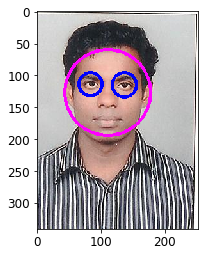

In [6]:
for (x,y,w,h) in faces:
    center = (x + w//2, y + h//2)
    image = cv2.ellipse(image, center, (w//2, h//2), 0, 0, 360, (255, 0, 255), 4)
    faceROI = gray[y:y+h,x:x+w]
    #Detect eyes in the face
    eyes = eye_cascade.detectMultiScale(faceROI)
    for (x2,y2,w2,h2) in eyes:
        eye_center = (x + x2 + w2//2, y + y2 + h2//2)
        radius = int(round((w2 + h2)*0.25))
        image = cv2.circle(image, eye_center, radius, (255, 0, 0 ), 4)
plt.imshow(fixColor(image))


# Video Processing with Haar Cascade

In this section we will apply a eye detector in a video. We will also measure the performance of the processing by calculating the FPS or Frames per Second.


Intialising the FPS counter

In [41]:
from imutils.video import FPS
fps=FPS()
start=fps.start()
frameCnt=0

Declare the ouput file

In [42]:
writer = cv2.VideoWriter("output.mp4", 
                         cv2.VideoWriter_fourcc(*"MP4V"), 30,(640,480))

Read the input image and count the total number of frames in the video

In [43]:
#Create a new video stream and get total frame count
video_stream = cv2.VideoCapture('images/faces.mp4')
total_frames=video_stream.get(cv2.CAP_PROP_FRAME_COUNT)
total_frames

528.0

In [44]:
#fps = FPS().start
frameCnt=0
while(frameCnt < 300):
    #print (frameCnt)
    frameCnt+=1
    ret, frame = video_stream.read()

    # Convert current frame to grayscale
    gframe = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
    gframe = cv2.equalizeHist(gframe)
    eyes = eye_cascade.detectMultiScale(gframe, 1.3, 5)
    if len(eyes) > 0:
        for (x,y,w,h) in eyes:
            center = (x + w//2, y + h//2)
            frame = cv2.ellipse(frame, center, (w//2, h//2), 0, 0, 360, (255, 0, 255), 4)
    writer.write(cv2.resize(frame, (640,480)))
    fps.update() #update fps

fps.stop()

print("FPS: {:.3f}".format(fps.fps()))

#Release video object
video_stream.release()
writer.release()


FPS: 9.508
